# Crab Age Regression Kaggle Playground Series

In [1]:
import kaggle
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
# Call the dataset into your local machine : the simple way
# od.download(
#     "https://www.kaggle.com/competitions/playground-series-s3e16/data")

In [2]:
train = pd.read_csv(r'D:/Data Science Project/Personal Project/Regression-with-a-Crab-Age-Kaggle/playground-series-s3e16/train.csv')
test = pd.read_csv(r'D:/Data Science Project/Personal Project/Regression-with-a-Crab-Age-Kaggle/playground-series-s3e16/test.csv')
sample = pd.read_csv(r'D:/Data Science Project/Personal Project/Regression-with-a-Crab-Age-Kaggle/playground-series-s3e16/sample_submission.csv')

In [3]:
train_short = train[:5000]
train = train_short.copy()

### Data Observation

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5000 non-null   int64  
 1   Sex             5000 non-null   object 
 2   Length          5000 non-null   float64
 3   Diameter        5000 non-null   float64
 4   Height          5000 non-null   float64
 5   Weight          5000 non-null   float64
 6   Shucked Weight  5000 non-null   float64
 7   Viscera Weight  5000 non-null   float64
 8   Shell Weight    5000 non-null   float64
 9   Age             5000 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 390.8+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 2   Length          49368 non-null  float64
 3   Diameter        49368 non-null  float64
 4   Height          49368 non-null  float64
 5   Weight          49368 non-null  float64
 6   Shucked Weight  49368 non-null  float64
 7   Viscera Weight  49368 non-null  float64
 8   Shell Weight    49368 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.4+ MB


In [7]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [8]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


- We have seen that the data was clean from missing values or invalid data types
- We can move into the next steps 

In [14]:
def drop_missing_rows(df):
    if df.isnull().any().any():
        print("Missing Values found in the dataframe..")
        df = df.dropna(axis=0)
        dropped_rows = len(df) - len(df.dropna())
        print(f"Dropped {dropped_rows} rows.")
    else:
        print('No missing values found in the dataframe')
    return df 

train = drop_missing_rows(train)
test = drop_missing_rows(test)

No missing values found in the dataframe
No missing values found in the dataframe


In [ ]:
def drop_duplicates_rows(df):
    if df.duplicated().any().any():
        print("Duplicated values were found in the dataframe")
        df = df.drop_duplicates()
        dropped_rows = len(df) - len(df.drop_duplicates())
        print(f'Dropped {dropped_rows} rows")

In [17]:
train.duplicated().any().any()

False

**Create Numerical Data Distribution Between Data**

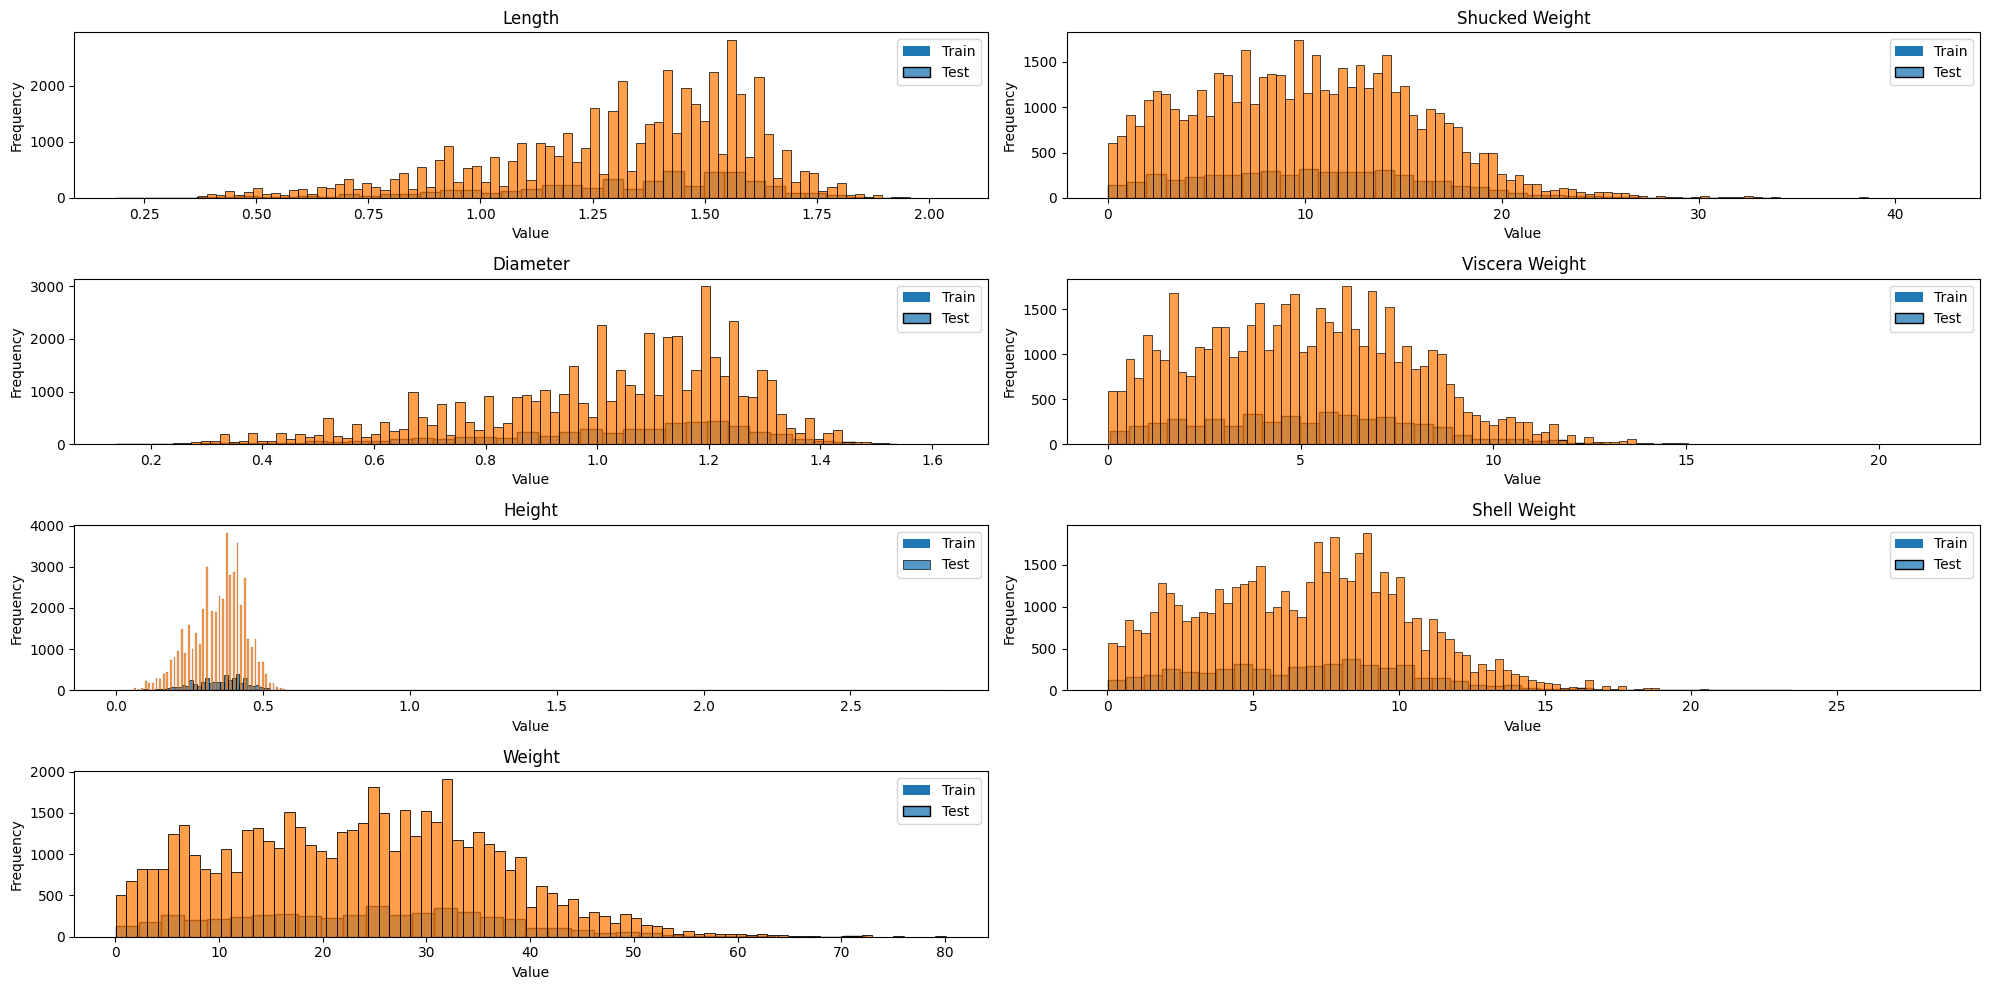

In [12]:
fig, axs = plt.subplots(4, 2, figsize = (20, 10))

def plot_hist(col, x, y):
    axs[x, y].set_title(col)  # Set the title for the subplot
    sns.histplot(train[col], ax=axs[x, y])
    axs[x, y].set_xlabel('Value')
    axs[x, y].set_ylabel('Frequency')
    sns.histplot(test[col], ax=axs[x, y])
    axs[x, y].legend(['Train', 'Test'])  # Set the legend labels

plot_hist('Length', 0, 0)
plot_hist('Diameter', 1, 0)
plot_hist('Height', 2, 0)
plot_hist('Weight', 3, 0)
plot_hist('Shucked Weight', 0, 1)
plot_hist('Viscera Weight', 1, 1)
plot_hist('Shell Weight', 2, 1)

# Remove the subplot at position [3, 1]
axs[3, 1].remove()

plt.tight_layout()
plt.show()

**Analyze Correlation**

C:\Users\user\AppData\Local\Temp\ipykernel_6660\768474506.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


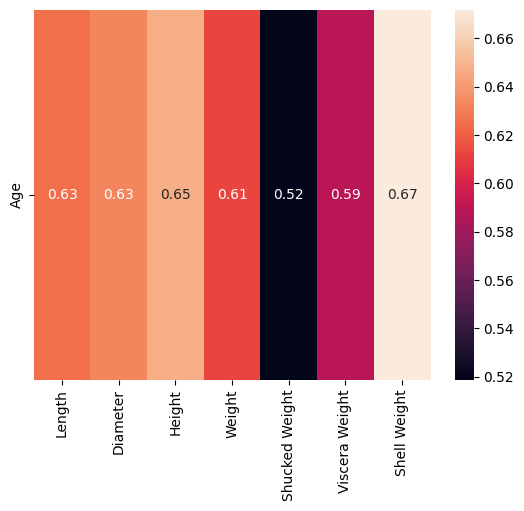

In [13]:
ax, fig = plt.subplots()

corr_matrix = train.corr()
x_correlations = corr_matrix['Age']
correlation_subset = corr_matrix.loc[['Age'], :]
correlation_subset = correlation_subset.drop(['Age', 'id'], axis = 1)
sns.heatmap(correlation_subset, annot = True)

plt.show()

### Data Cleaning

The Data Was Clean, i think there is no necessary improvement that we could afford for now 

### Data Preprocessing

In [14]:
# exclude unused features
train = train.drop('id', axis=1)

X = train.drop('Age', axis=1)
y = train['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# perform min max scaler
def std_scaler(data):
    num_columns = data.select_dtypes(include=['float', 'int']).columns 
    data[num_columns] = StandardScaler().fit_transform(data[num_columns])

std_scaler(X_train)
std_scaler(X_test)

In [18]:
# perform label encoding
le = LabelEncoder() 
def label_encoding(data):
    for i in data.columns : 
        if(data[i].dtype == 'object') or (len(data[i].value_counts()) == 2):
            data[i] = le.fit_transform(data[i])
    data = pd.get_dummies(data)

label_encoding(X_train)
label_encoding(X_test)

### Model Training
Several regression models that i want to use : 
1. Decision Trees Regressor
2. Linear Regression 
3. Random Forest Regressor
4. SVM
5. XGBoost Regressor 

In [19]:
# train the model using decision trees

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred = dt.predict(X_test)

### Model Evaluation

In [22]:
print(mean_absolute_error(y_test, y_pred))

1.892


### Submit Models 

In [23]:
test = test.drop('id', axis=1)

In [24]:
std_scaler(test)
label_encoding(test)

In [25]:
y_pred = dt.predict(test)

In [26]:
sample['Age'] = y_pred